IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np

LOADING THE DATASET

In [ ]:
df = pd.read_csv("/content/cubic_zirconia.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


EDA - EXPLORATORY DATA ANALYSIS

In [ ]:
#return the column names -> present in the dataset
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [ ]:
#return no.of rows & columns
df.shape

(26967, 11)

In [ ]:
#checking null values
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [ ]:
#datatype of columns
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [ ]:
#dropping null values
df = df.dropna()

In [ ]:
#dropping the column -> "Unnamed: 0" since the column contains only the index 
df = df.drop(["Unnamed: 0"],axis = 1)

In [ ]:
df.describe()

,carat,depth,table,x,y,z,price
count,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000
mean,0.797995,61.745147,57.456011,5.729167,5.732967,3.536636,3937.973734
std,0.477214,1.412860,2.230776,1.127515,1.166330,0.699335,4022.189341
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5361.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


From the above output we get to know that there are null entries as 0 in columns x,y,z. So we should remove those values.

In [ ]:
df=df.drop(df[df["x"]==0].index)
df=df.drop(df[df["y"]==0].index)
df=df.drop(df[df["z"]==0].index)

In [ ]:
#getting the rechanged dataset shape
df.shape

(26261, 10)

DATA VISUALISATION

In [ ]:
import seaborn as sns

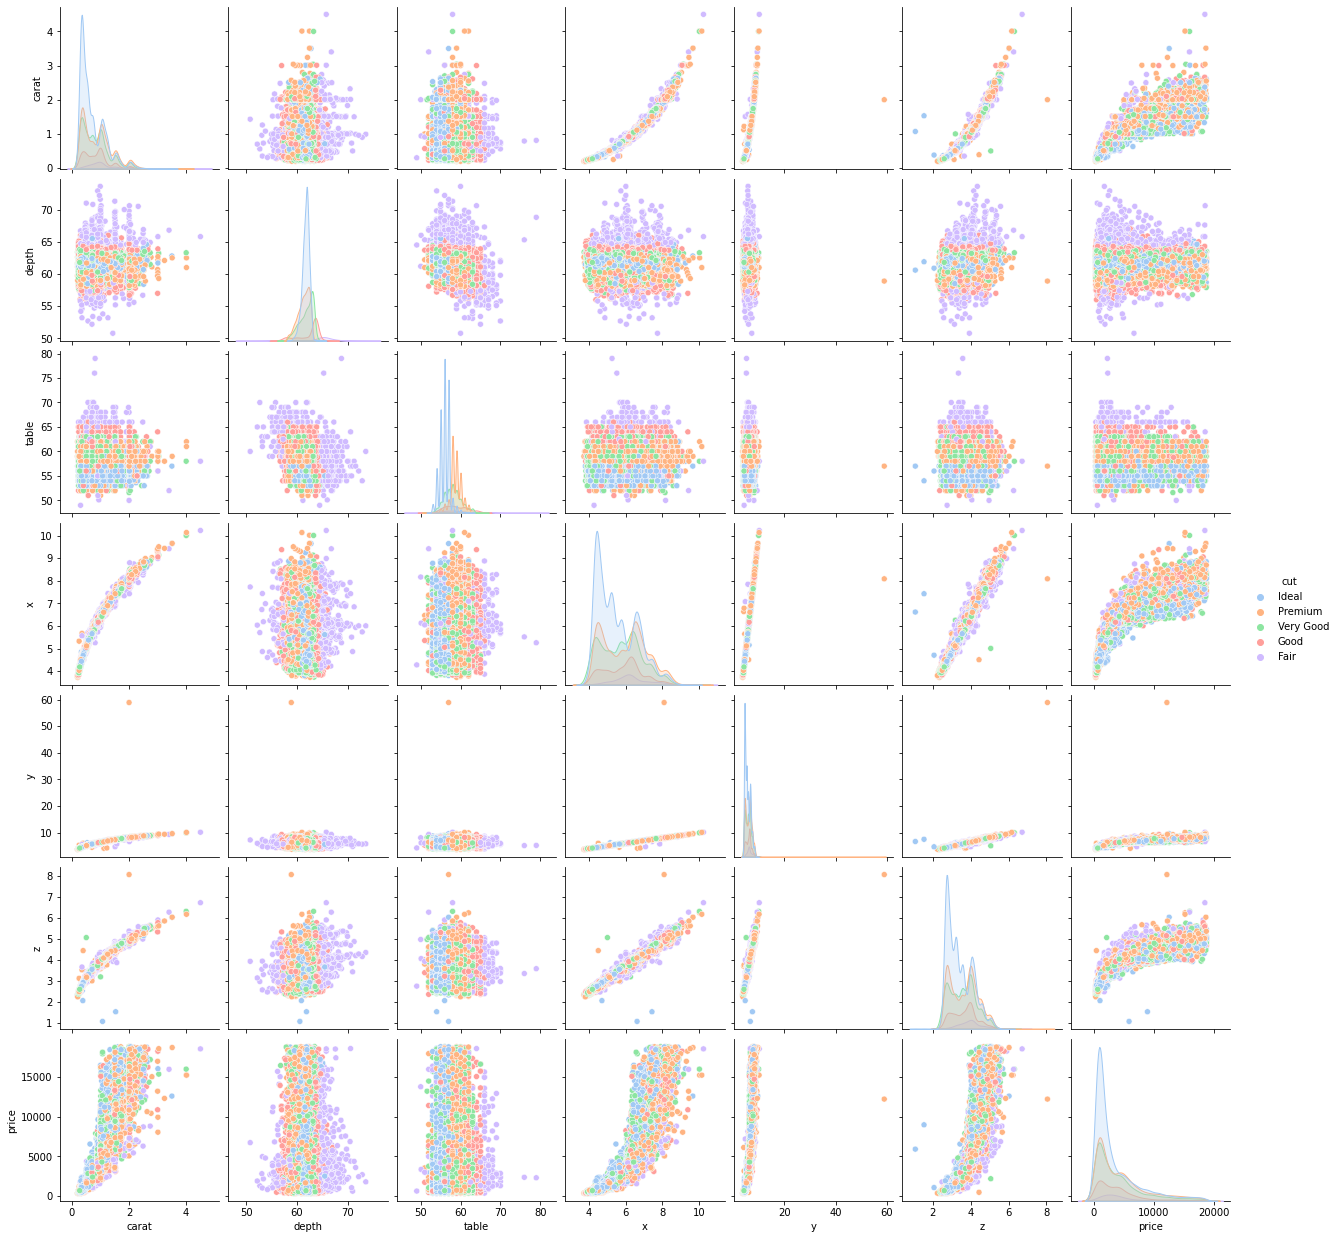

In [ ]:
ax = sns.pairplot(df,hue="cut",palette='pastel')

PLOTTING REGRESSION LINE TO CHECK THE OUTLIERS

Text(0.5, 1.0, "Regression Line on Price vs 'x'")

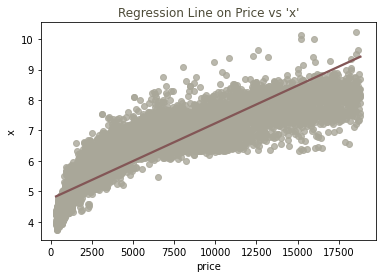

In [ ]:
ax = sns.regplot(x="price",y="x",data=df,fit_reg=True,scatter_kws={"color":"#a9a799"},line_kws={"color":"#835656"})
ax.set_title("Regression Line on Price vs 'x'",color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

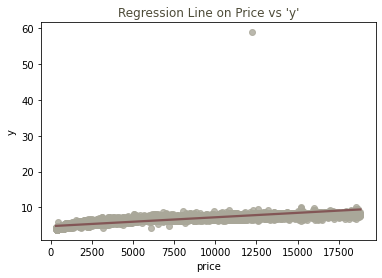

In [ ]:
ax = sns.regplot(x="price",y="y",data=df,fit_reg=True,scatter_kws={"color":"#a9a799"},line_kws={"color":"#835656"})
ax.set_title("Regression Line on Price vs 'y'",color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

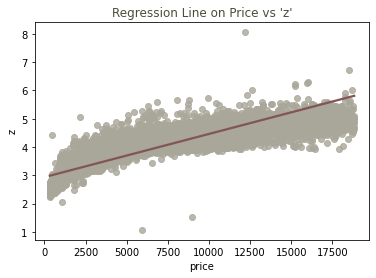

In [ ]:
ax = sns.regplot(x="price",y="z",data=df,fit_reg=True,scatter_kws={"color":"#a9a799"},line_kws={"color":"#835656"})
ax.set_title("Regression Line on Price vs 'z'",color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'depth'")

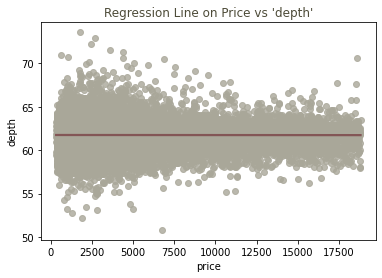

In [ ]:
ax = sns.regplot(x="price",y="depth",data=df,fit_reg=True,scatter_kws={"color":"#a9a799"},line_kws={"color":"#835656"})
ax.set_title("Regression Line on Price vs 'depth'",color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'table'")

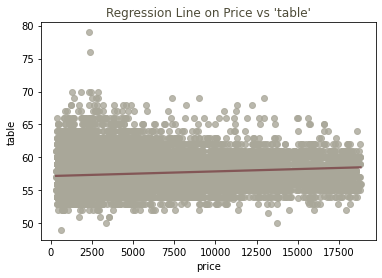

In [ ]:
ax = sns.regplot(x="price",y="table",data=df,fit_reg=True,scatter_kws={"color":"#a9a799"},line_kws={"color":"#835656"})
ax.set_title("Regression Line on Price vs 'table'",color="#4e4c39")

FROM THE ABOVE PLOTS, I HAVE INFERRED THAT THERE IS A RANGE FOR OUTLIERS AND HANDLED THE OUTLIERS BELOW

In [ ]:
df =df[(df["depth"]<75)&(df["depth"]>45)]
df =df[(df["table"]<80)&(df["table"]>40)]
df =df[(df["x"]<30)]
df =df[(df["y"]<30)]
df =df[(df["z"]<30)&(df["z"]>2)]

In [ ]:
df.shape

(26258, 10)

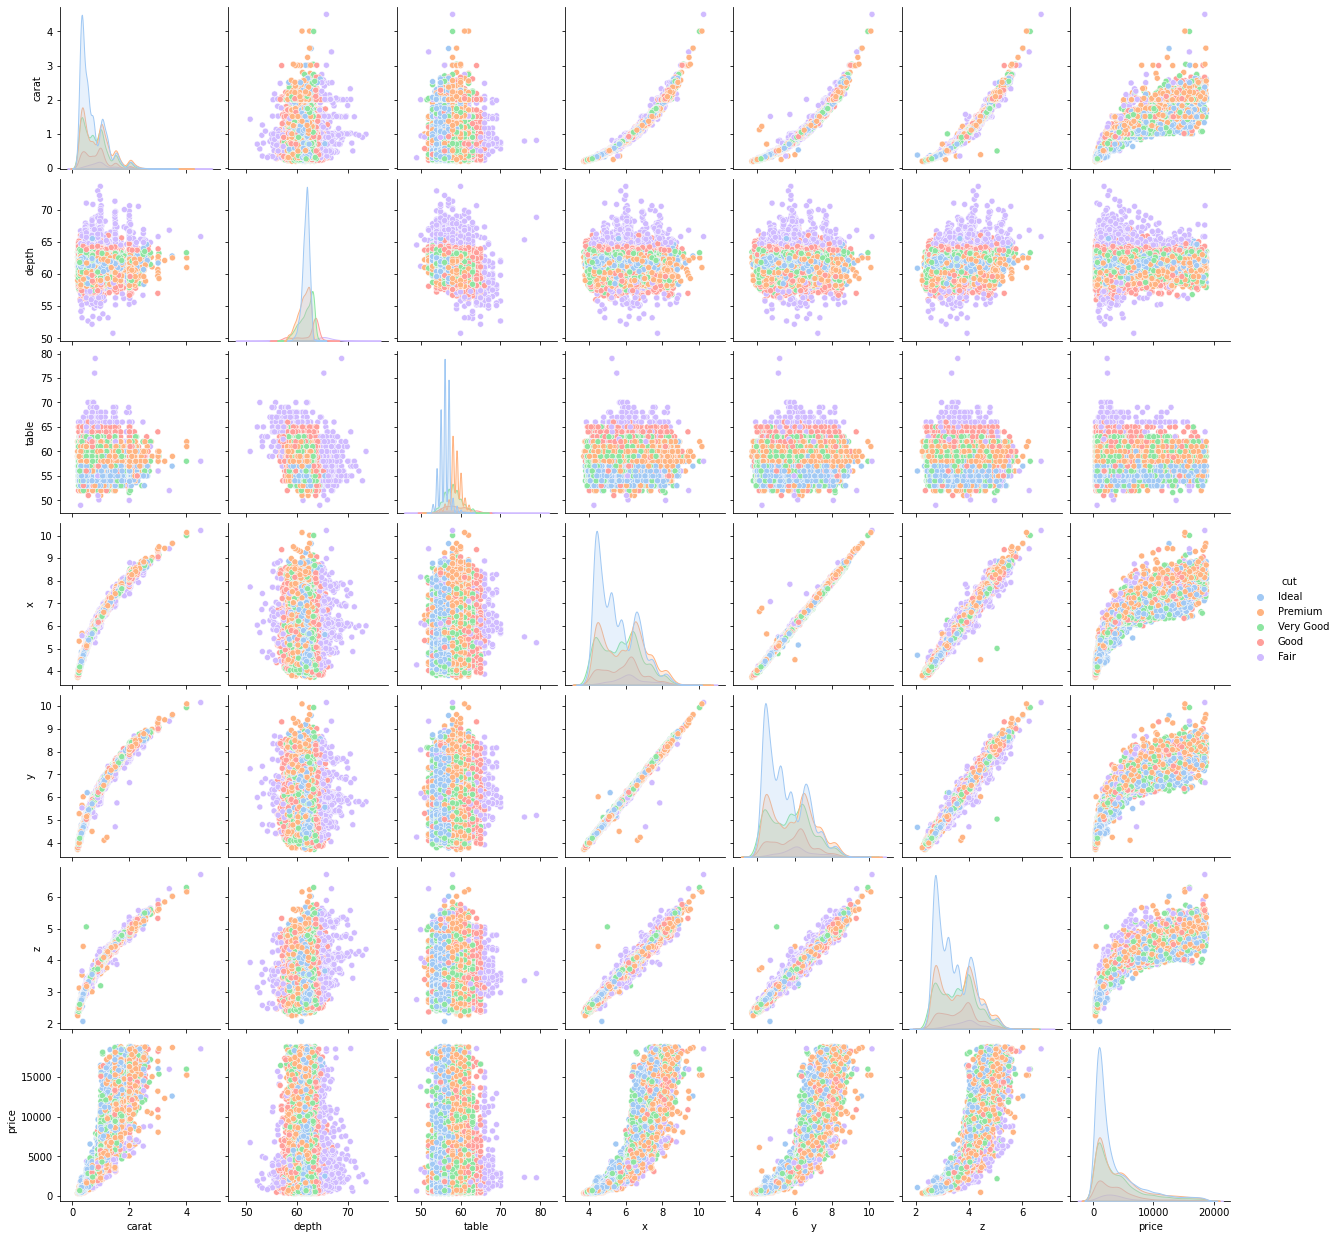

In [ ]:
ax = sns.pairplot(df,hue="cut",palette="pastel")

In [ ]:
#getting the categorical variables
s = (df.dtypes=="object")
categorical_cols = list(s[s].index)
print("Categorical Variables:")
print(categorical_cols)

Categorical Variables:
['cut', 'color', 'clarity']


UNIVARIATE AND BIVARIATE ANALYSIS

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Cut')

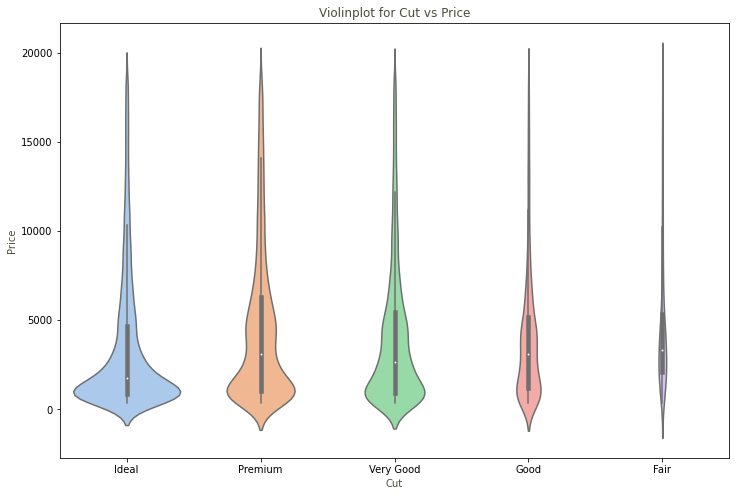

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="cut",y="price",data = df, palette="pastel",scale="count")
ax.set_title("Violinplot for Cut vs Price",color="#4e4c39")
ax.set_ylabel("Price",color="#4e4c39")
ax.set_xlabel("Cut",color="#4e4c39")

Text(0.5, 0, 'Clarity')

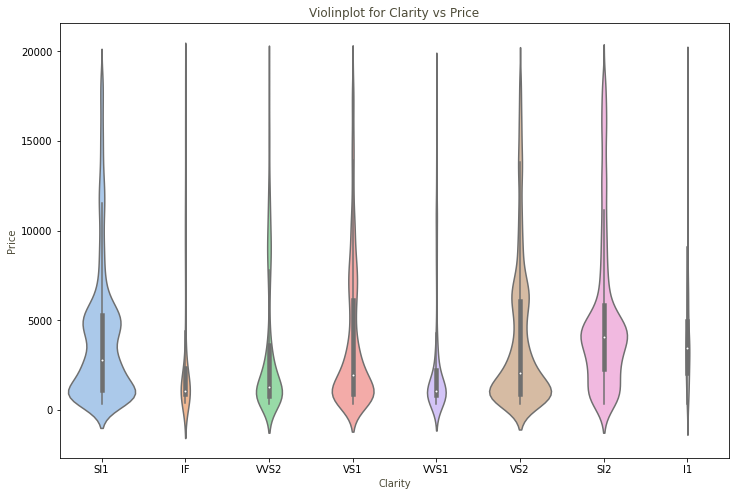

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="clarity",y="price",data = df, palette="pastel",scale="count")
ax.set_title("Violinplot for Clarity vs Price",color="#4e4c39")
ax.set_ylabel("Price",color="#4e4c39")
ax.set_xlabel("Clarity",color="#4e4c39")

Text(0.5, 0, 'Clarity')

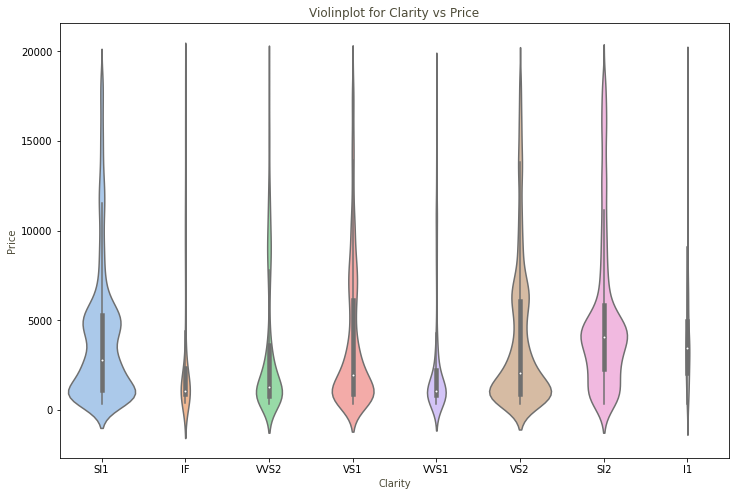

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="clarity",y="price",data = df, palette="pastel",scale="count")
ax.set_title("Violinplot for Clarity vs Price",color="#4e4c39")
ax.set_ylabel("Price",color="#4e4c39")
ax.set_xlabel("Clarity",color="#4e4c39")

ENCODING THE CATEGORICAL VALUES 

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
le = df.copy()

In [ ]:
label_encoder = LabelEncoder()
for col in categorical_cols:
  le[col] = label_encoder.fit_transform(le[col])
le.head() 

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


In [ ]:
df.describe()

,carat,depth,table,x,y,z,price
count,26258.000000,26258.000000,26258.000000,26258.000000,26258.000000,26258.000000,26258.000000
mean,0.797720,61.745491,57.455419,5.729236,5.731109,3.537846,3936.152411
std,0.477012,1.412348,2.229934,1.125571,1.117392,0.695586,4020.409041
min,0.200000,50.800000,49.000000,3.730000,3.710000,2.060000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2374.000000
75%,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000,5357.500000
max,4.500000,73.600000,79.000000,10.230000,10.160000,6.720000,18818.000000


FROM THE ABOVE IT IS INFERRED THAT THERE IS NO NULL ENTRIES LIKE ZERO'S

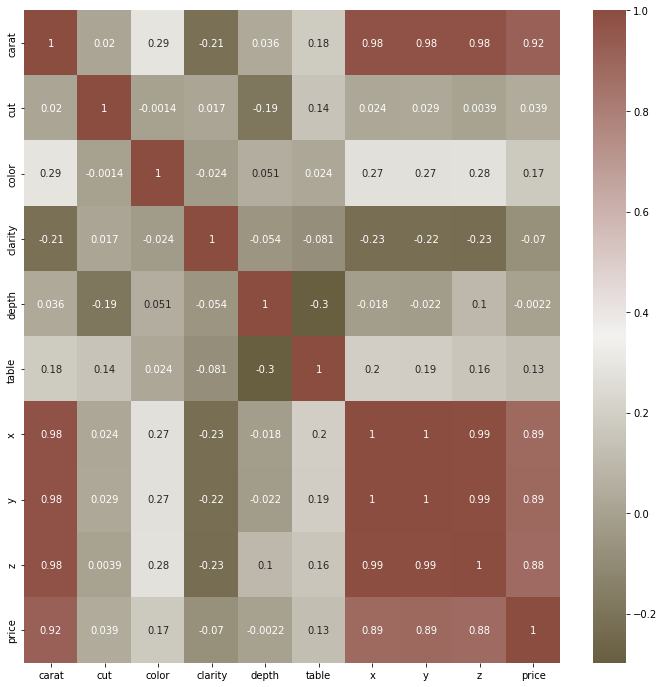

In [ ]:
#correlation matrix -> heatmap
map = sns.diverging_palette(70,20,s=50,l=40,n=6,as_cmap = True)
correlation_mat = le.corr() 
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat,cmap=map,annot=True,)

SPLITTING THE DATASET INTO X AND Y --> TO TRAIN THE MODEL

In [ ]:
x = le.drop(['price'],axis=1)
y = le["price"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f396b1b4e50>,
      dtype=object)

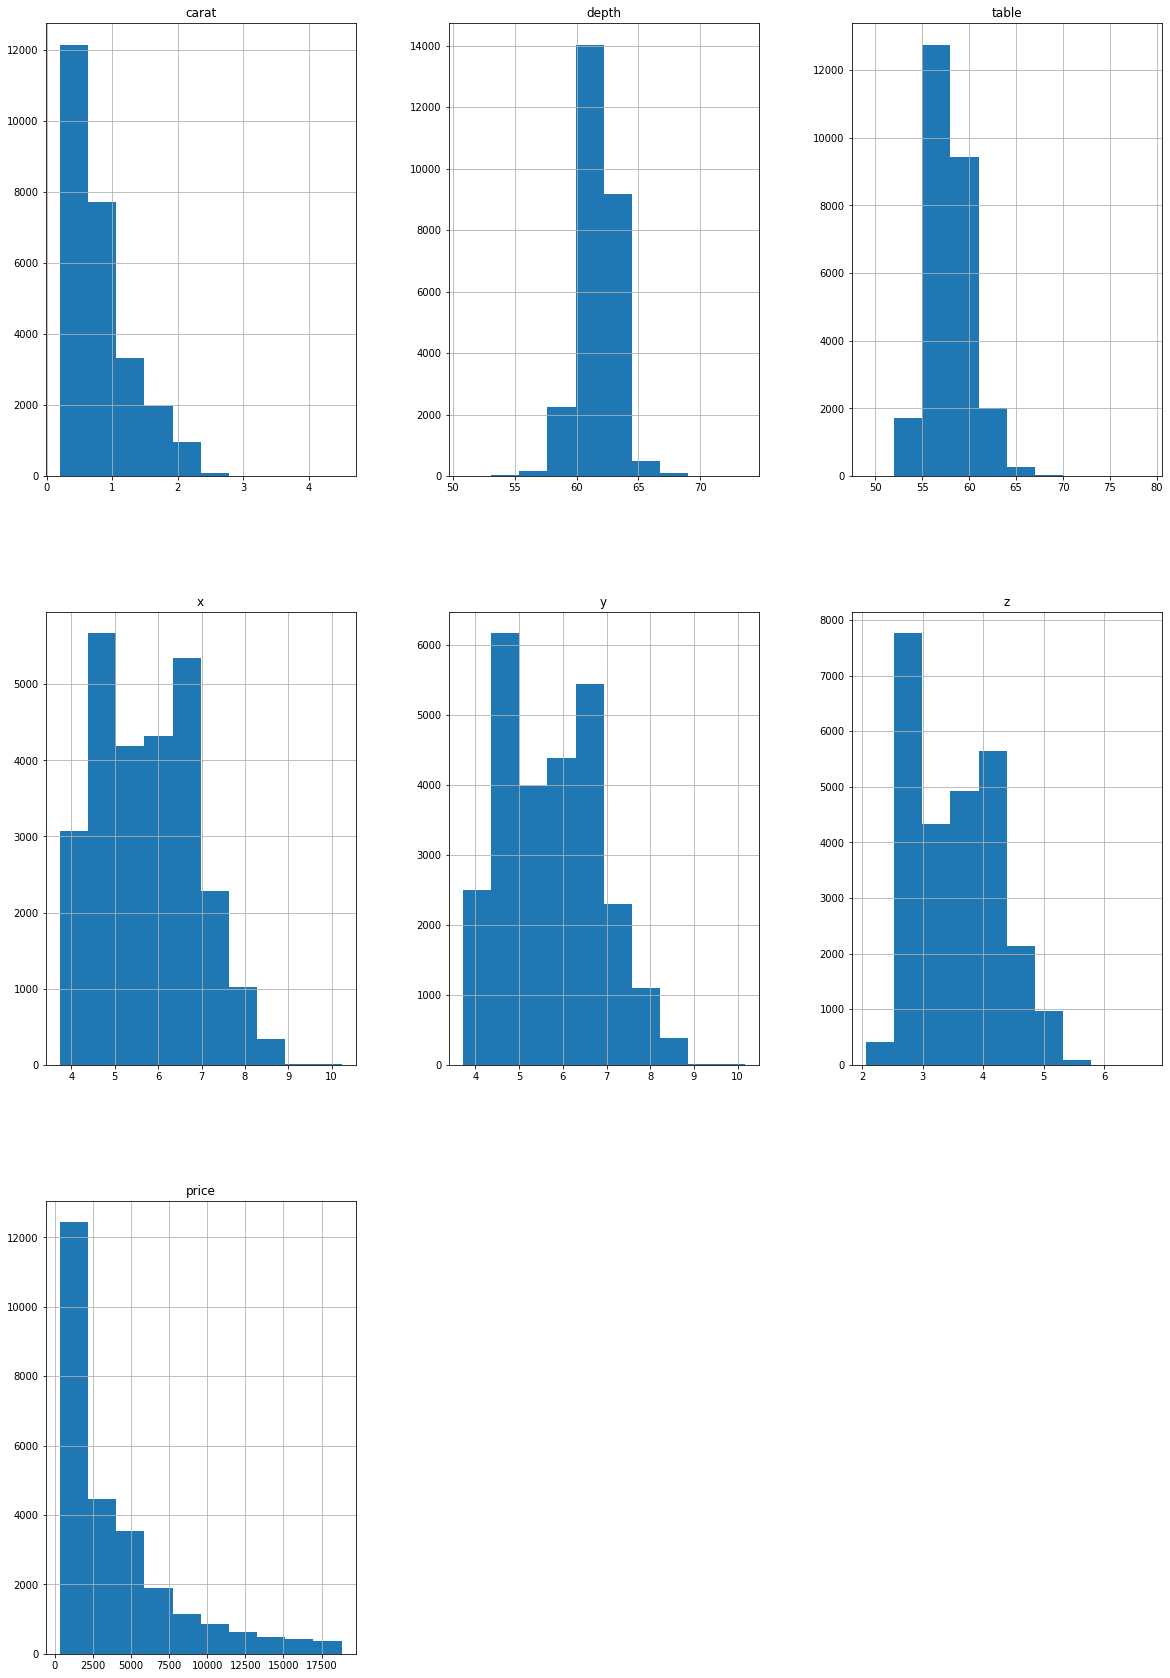

In [ ]:
#univariate analysis
df.hist(figsize=(20,30))

In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


carat    1.118087
depth   -0.027555
table    0.767888
x        0.402450
y        0.398060
z        0.402902
price    1.620408
dtype: float64

In [ ]:
cols = ['carat','depth', 'table', 'x', 'y', 'z','price' ]

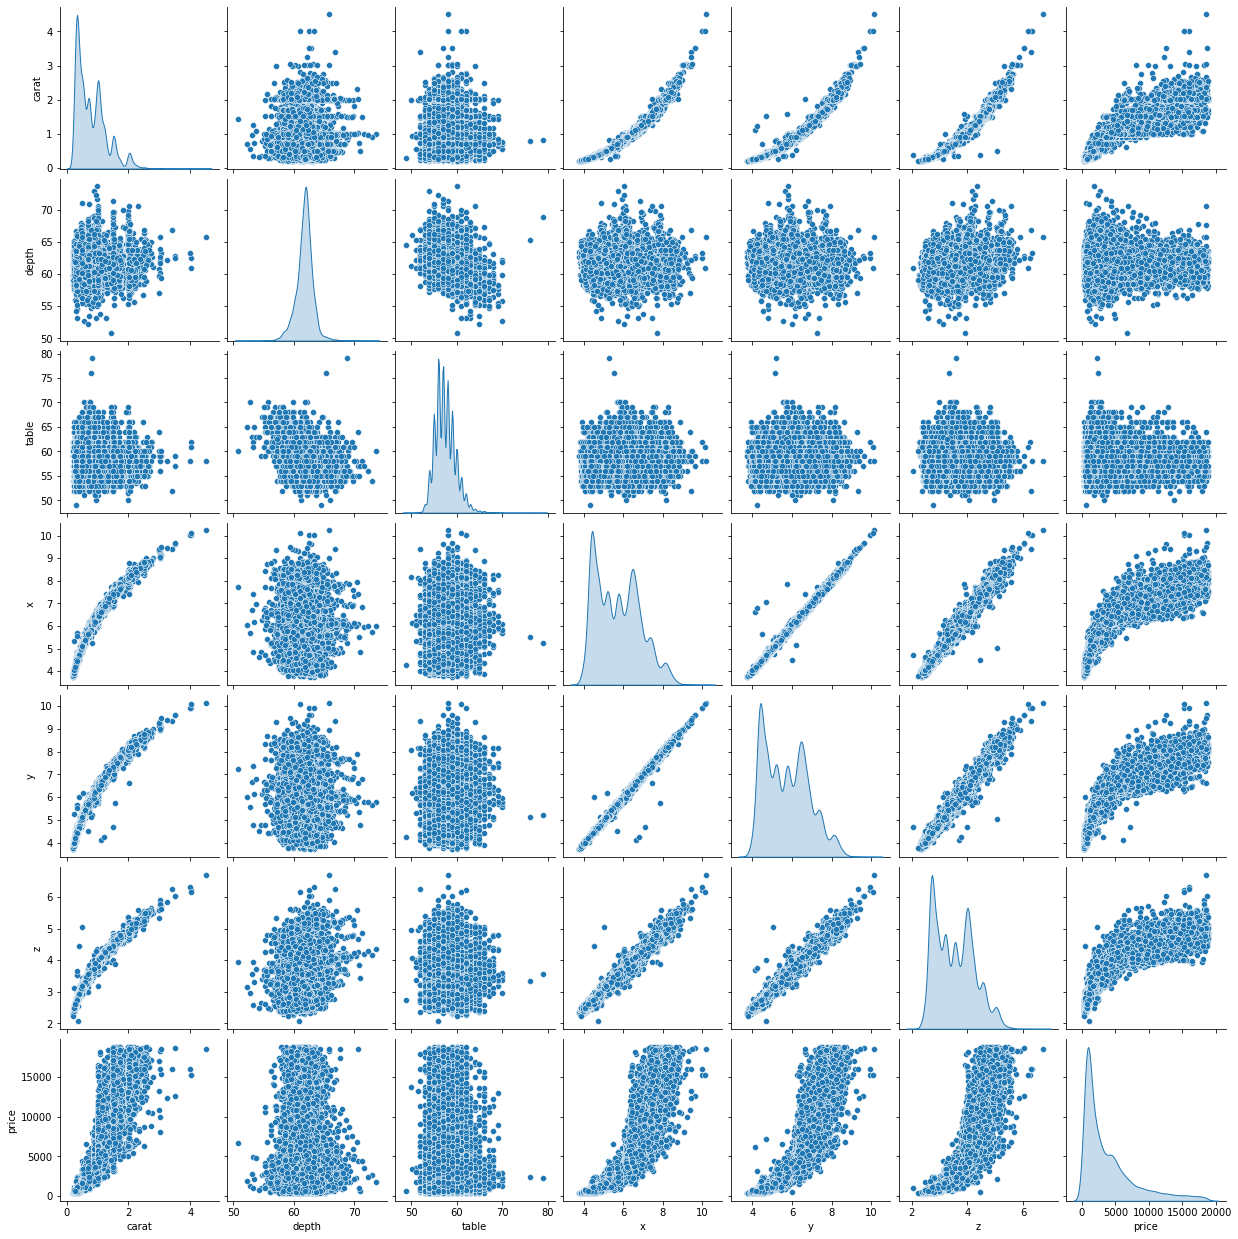

In [ ]:
#bivariate analysis
df_attr = df[cols]
sns.pairplot(df_attr,diag_kind="kde")
plt.show()

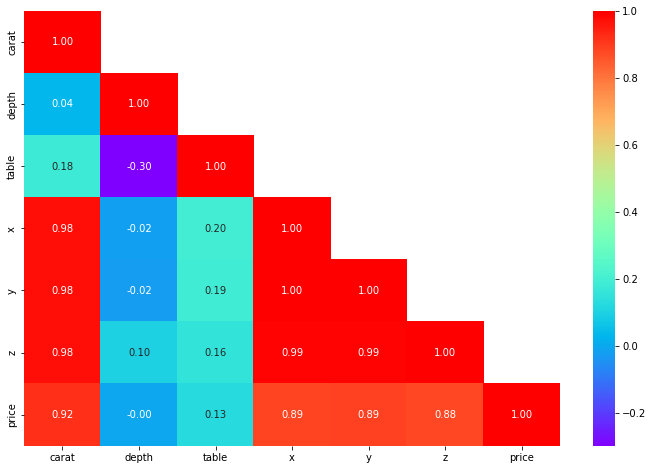

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.corr(),+1))
plt.show()

In [ ]:
correlations = df.corr()
correlations["price"].sort_values(ascending=False)

price    1.000000
carat    0.922109
y        0.888797
x        0.887253
z        0.883007
table    0.126851
depth   -0.002214
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


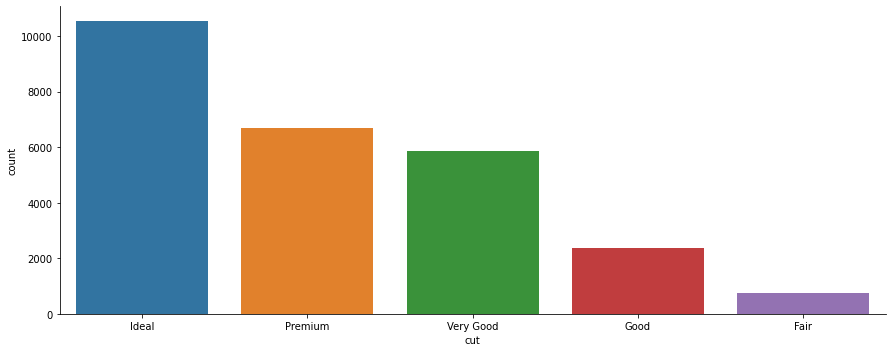

In [ ]:
sns.catplot('cut', data= df, kind='count',aspect=2.5)

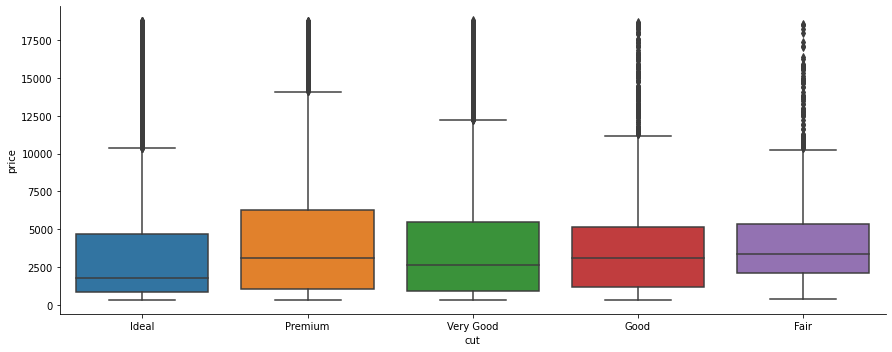

In [ ]:
sns.catplot(x='cut', y='price', kind='box', data=df, aspect=2.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


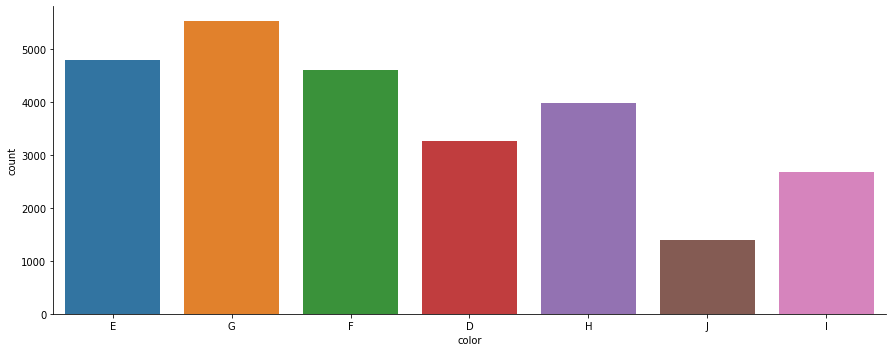

In [ ]:
sns.catplot('color', kind='count', data=df, aspect=2.5)

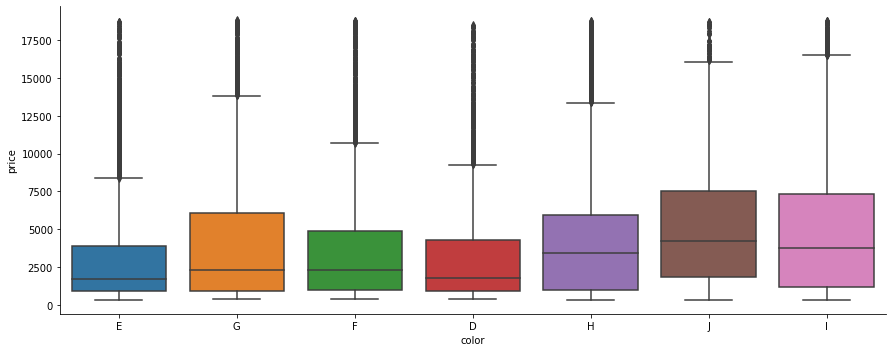

In [ ]:
sns.catplot(x='color', y='price', data=df, aspect =2.5, kind='box')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


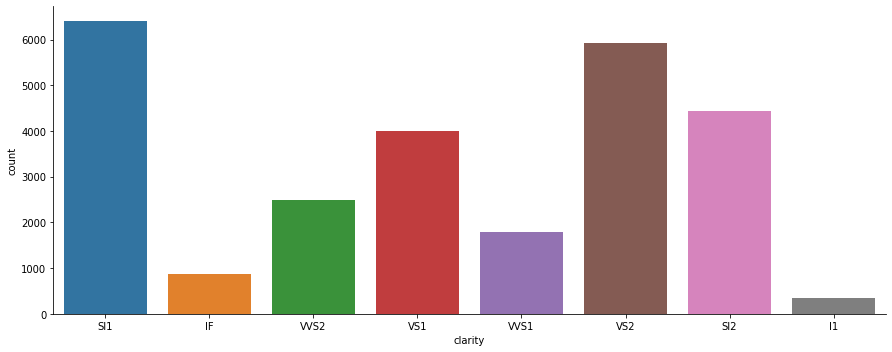

In [ ]:
sns.catplot('clarity', data=df, kind='count',aspect=2.5)

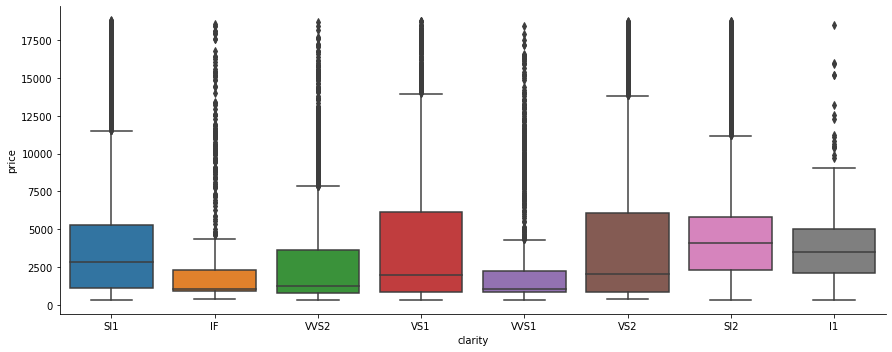

In [ ]:
sns.catplot(x='clarity', y='price', data=df, aspect =2.5, kind='box')

In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2374.00
dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
regression_model.score(x_train,y_train)

0.8862582958086046

In [ ]:
regression_model.score(x_test,y_test)

0.8944568105934704

In [ ]:
regression_model.predict(x_test)

array([ 529.19147973, 7215.7638803 , 2504.06991323, ..., 8700.75392868,
       3828.97043661, 1642.9271399 ])